In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
# read data
data_path = "C:\\Repository\\DS-Intership-data\\clean_data\\"
item_categories = pd.read_csv(data_path + "item_categories.csv", index_col=0)
items = pd.read_csv(data_path + "items.csv", index_col=0)
sales_train = pd.read_csv(data_path + "sales_train.csv", index_col=0)
sample_submission = pd.read_csv(data_path + "sample_submission.csv", index_col=0)
shops = pd.read_csv(data_path + "shops.csv", index_col=0)
test = pd.read_csv(data_path + "test.csv", index_col=0)
sales_per_months = pd.read_csv(data_path + "sales_per_months.csv", index_col=0)
all_data = pd.read_csv(data_path + "all_data.csv", index_col=0)

In [3]:
# we can try to check what clusters have low/high sales
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [5]:
# for checking the most popular items 
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 692.8+ KB


In [7]:
# can try check how time (seasons, special months) correlation with sales
# can check for shops with largest amount of sales
# can compare sales of cheap items vs expensive
# corr matrix

sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
3,2013-01-06,0,25,2554,1709.0,1.0
4,2013-01-15,0,25,2555,1099.0,1.0
5,2013-01-10,0,25,2564,349.0,1.0


In [8]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919577 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 155.9+ MB


In [9]:
# for check how time (every month) influence on sales
sales_per_months.head()

,ID,item_cnt_month
month_year,,
2013-01,5122,1.0
2013-01,5127,3.0
2013-01,5142,2.0
2013-01,5143,9.0
2013-01,5152,1.0


In [10]:
sales_per_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598404 entries, 2013-01 to 2015-10
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              598404 non-null  int64  
 1   item_cnt_month  598404 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 13.7+ MB


In [11]:
# check what shops have best income
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [13]:
# clusters by sales
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 6.5 MB


## EDA

###### checking of sales distributuon:

C:\Users\maxim\AppData\Local\Temp\ipykernel_19724\3682997020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_per_months.item_cnt_month)


<Axes: xlabel='item_cnt_month', ylabel='Density'>

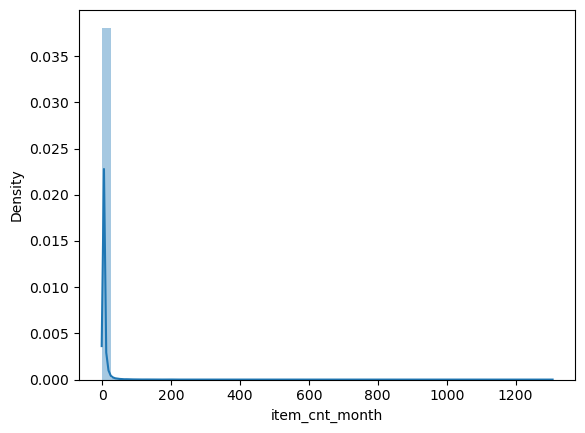

In [15]:
sns.distplot(sales_per_months.item_cnt_month)

In [16]:
sales_per_months['item_cnt_month'].value_counts().head(20)

1.0     359247
2.0     109883
3.0      45727
4.0      24343
5.0      14984
6.0       9802
7.0       6572
8.0       4973
9.0       3518
10.0      2798
11.0      2064
12.0      1691
13.0      1468
14.0      1141
15.0       993
16.0       821
17.0       755
18.0       629
19.0       556
20.0       462
Name: item_cnt_month, dtype: int64

C:\Users\maxim\AppData\Local\Temp\ipykernel_19724\1527808153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_per_months[sales_per_months.item_cnt_month<1000])


<Axes: ylabel='Density'>

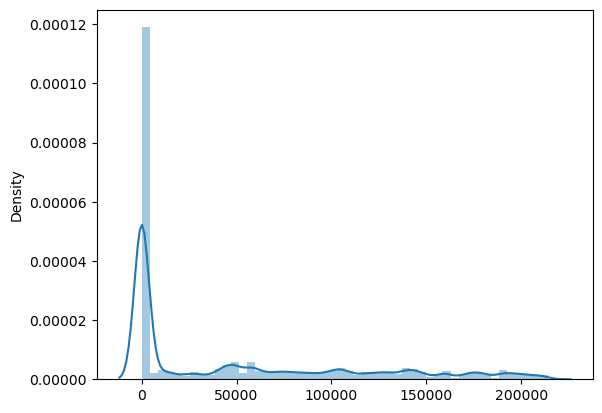

In [17]:
sns.distplot(sales_per_months[sales_per_months.item_cnt_month<1000])

###### looks like exponential distribution with very long tail

C:\Users\maxim\AppData\Local\Temp\ipykernel_19724\291674559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(all_data.item_price))


<Axes: xlabel='item_price', ylabel='Density'>

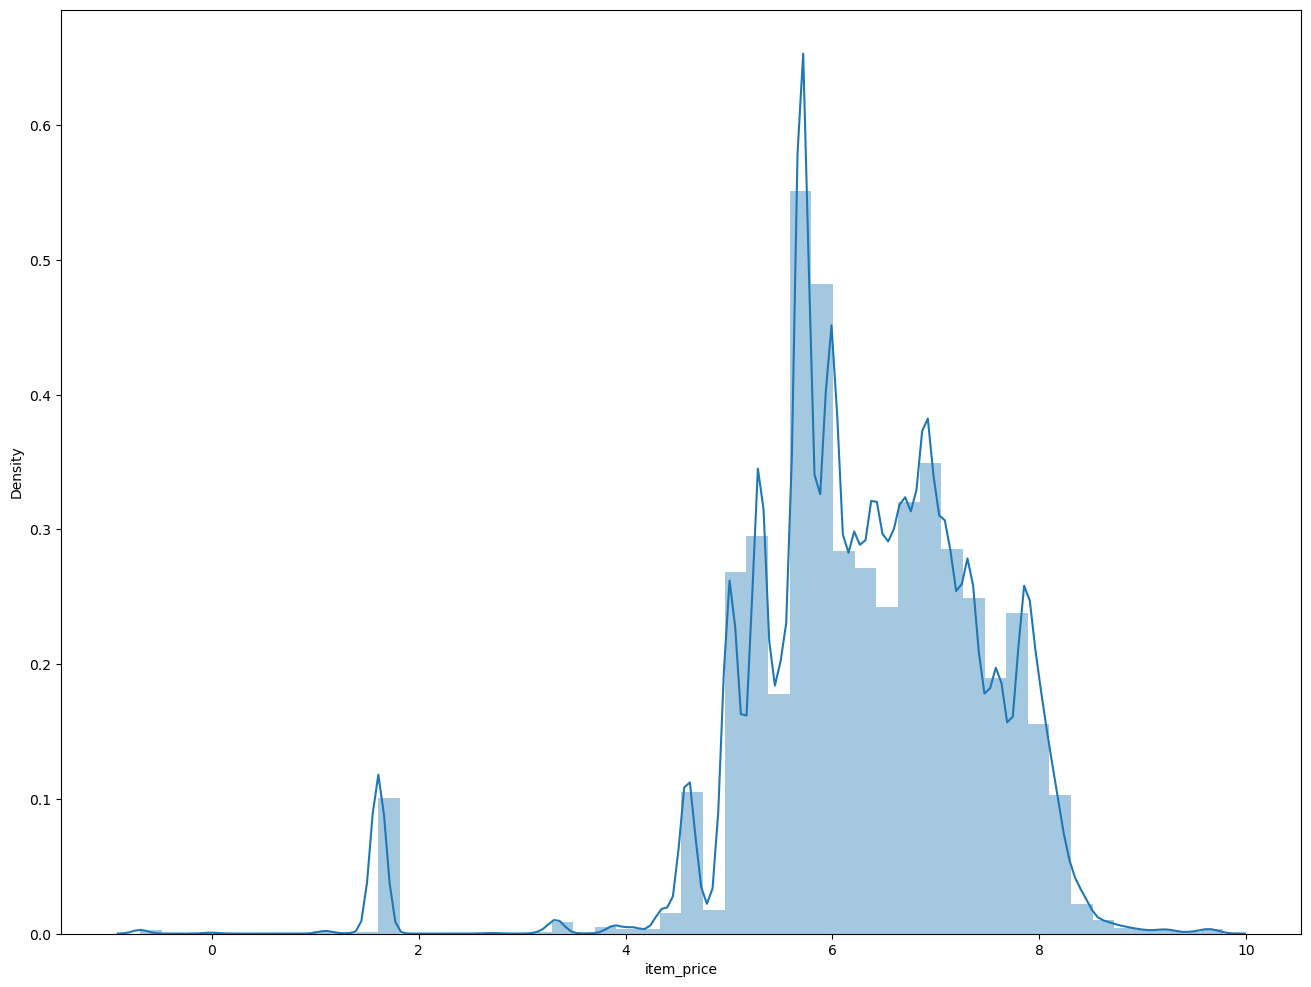

In [67]:
sns.distplot(np.log(all_data.item_price))

In [70]:
scipy.stats.normaltest(np.log(all_data.item_price))

NormaltestResult(statistic=309002.96443184384, pvalue=0.0)

In [20]:
sales_per_months.describe()

,ID,item_cnt_month
count,598404.0,598404.0
mean,98541.9,2.7
std,58052.0,10.5
min,0.0,1.0
25%,49329.0,1.0
50%,94289.0,1.0
75%,143387.2,2.0
max,214199.0,1305.0


###### as 75% of item_cnt_months is 2 most probably value like 2253 (1305 after last preprocessing) is outliers, so in the next parts of feature preprocessing we should cut long tail of our distribution to delete more outliers

###### checking for corr between time and sales (Timeseries analysis):

C:\Users\maxim\AppData\Local\Temp\ipykernel_19724\2607768744.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  cnt = g_by_months.set_xticklabels(g_by_months.get_xticklabels(), rotation=90)


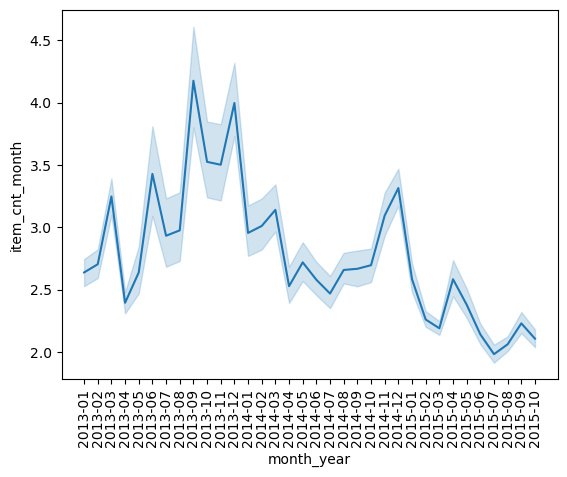

In [21]:
g_by_months = sns.lineplot(x=sales_per_months.index, y=sales_per_months.item_cnt_month)
cnt = g_by_months.set_xticklabels(g_by_months.get_xticklabels(), rotation=90)

In [22]:
len(all_data.week_number.unique())

148

In [23]:
# .agg({'item_price': 'sum', 'item_id': 'count',})
sales_per_weeks = all_data.groupby('week_number')['item_cnt_day'].agg(sum)

C:\Users\maxim\AppData\Local\Temp\ipykernel_19724\3599465009.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  cnt = g_by_weeks.set_xticklabels(g_by_weeks.get_xticklabels(), rotation=90)


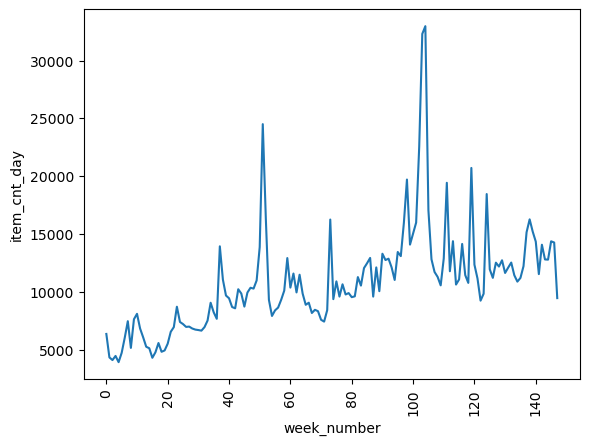

In [25]:
g_by_weeks = sns.lineplot(x=sales_per_weeks.index, y=sales_per_weeks)
cnt = g_by_weeks.set_xticklabels(g_by_weeks.get_xticklabels(), rotation=90)

###### ascending trend (from 2013 to 2014), descending trend (from 2014), the is seasonality (sales go up and down between month), no cycle (maybe need more years data for detect it)

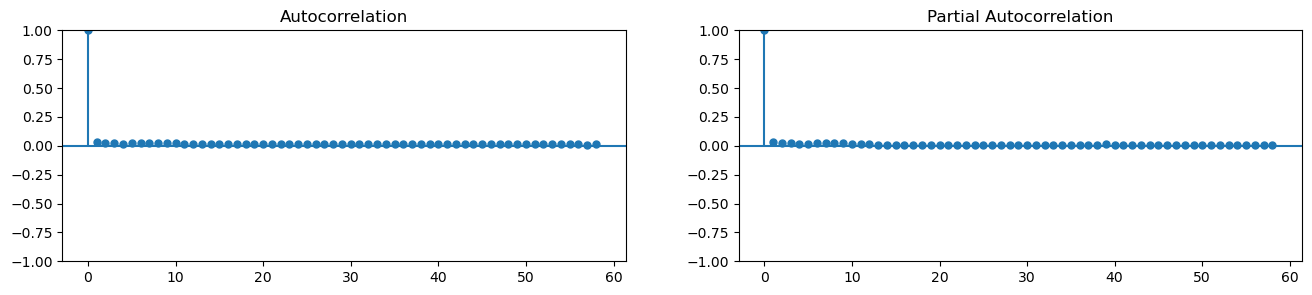

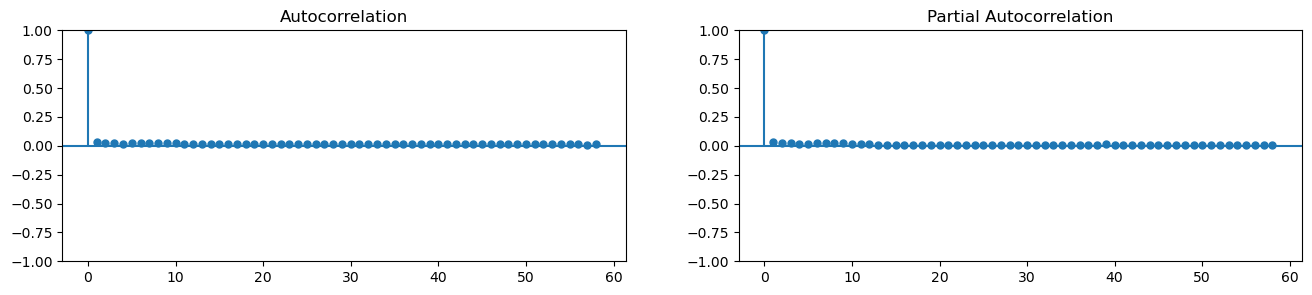

In [26]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(sales_per_months['item_cnt_month'], lags=None, ax=axes[0])
plot_pacf(sales_per_months['item_cnt_month'], lags=None, ax=axes[1])

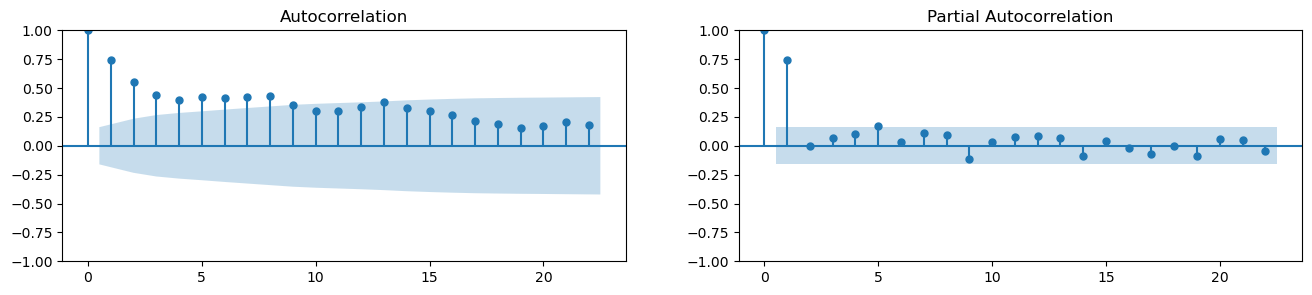

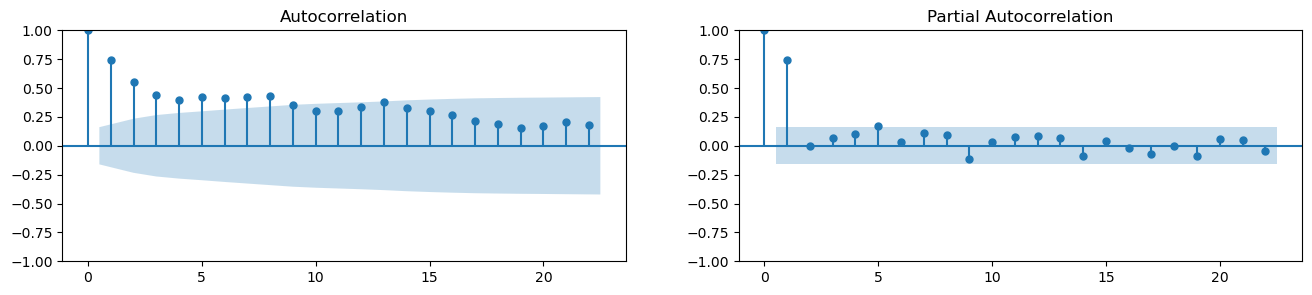

In [27]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(sales_per_weeks, lags=None, ax=axes[0])
plot_pacf(sales_per_weeks, lags=None, ax=axes[1])

looks like week dataseries is more informative

###### check how years and month with same names correlated by sales

In [28]:
all_data.head()

,date,month_number,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,ID,day,week_number,month,year
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150983,2,0,1,2013
1,2015-07-21,30,59,21619,499.0,1.0,ЧЕЛОВЕК ДОЖДЯ (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150917,21,133,7,2015
2,2013-01-08,0,59,21759,499.0,1.0,ЧУЖОЙ ПРОТИВ ХИЩНИКА (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",149993,8,1,1,2013
3,2013-06-28,5,59,21759,499.0,1.0,ЧУЖОЙ ПРОТИВ ХИЩНИКА (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",149993,28,25,6,2013
4,2014-11-04,22,59,21759,199.0,1.0,ЧУЖОЙ ПРОТИВ ХИЩНИКА (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",149993,4,96,11,2014


In [29]:
np.sort(all_data.month.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [30]:
all_data.head(2)

,date,month_number,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,ID,day,week_number,month,year
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150983,2,0,1,2013
1,2015-07-21,30,59,21619,499.0,1.0,ЧЕЛОВЕК ДОЖДЯ (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150917,21,133,7,2015


In [31]:
month_data = all_data.groupby(['week_number', 'month']).agg({'item_id': 'count'})\
    .reset_index().rename(columns={'item_id':'sales_cnt'})

In [32]:
year_data = all_data.groupby(['week_number', 'year']).agg({'item_id': 'count'})\
    .reset_index().rename(columns={'item_id':'sales_cnt'})

In [33]:
month_data.head(2)

,week_number,month,sales_cnt
0,0,1,5109
1,1,1,3671


In [34]:
year_data.week_number.iloc[53:104] = year_data.week_number.iloc[53:104].apply(lambda x: x - 52)
year_data.week_number.iloc[104:] = year_data.week_number.iloc[104:].apply(lambda x: x-104)

In [35]:
year_data.week_number.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, -1], dtype=int64)

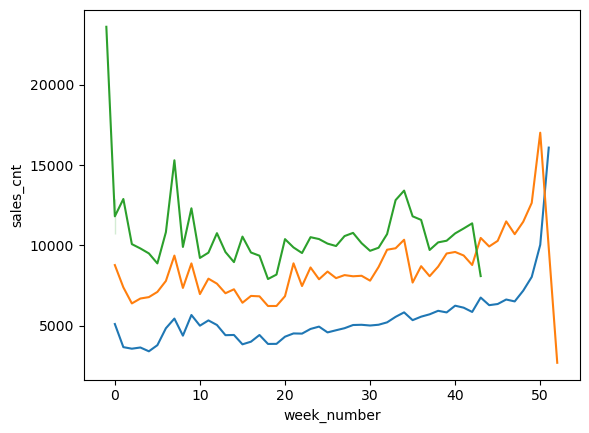

In [38]:
ax1 = sns.lineplot(x=year_data.week_number[:52], y=year_data.sales_cnt[:52])
ax2 = sns.lineplot(x=year_data.week_number[52:104], y=year_data.sales_cnt[52:104])
ax3 = sns.lineplot(x=year_data.week_number[104:], y=year_data.sales_cnt[104:])

###### sales for every year looks similary

<Axes: xlabel='week_number', ylabel='sales_cnt'>

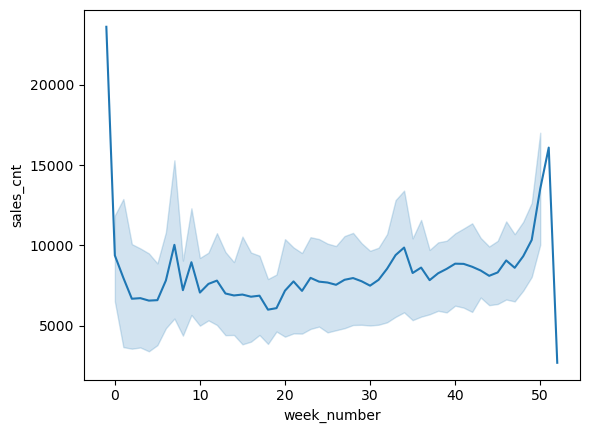

In [42]:
sns.lineplot(x=year_data.week_number, y=year_data.sales_cnt)

###### Check for shops with largest/smallest amount of sales

In [49]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [51]:
shops_month = shops.merge(test, how='inner', on='shop_id')

In [52]:
shops_month = sales_per_months.merge(shops_month, how='inner', on='ID')

In [53]:
shops_month.groupby('shop_name')['item_cnt_month'].agg(sum).sort_values(ascending=False).head(10)

shop_name
Москва ТЦ "Семеновский"           159455.0
Москва ТРК "Атриум"               122422.0
Москва ТЦ "МЕГА Теплый Стан" II    99686.0
СПб ТК "Невский Центр"             82180.0
Якутск Орджоникидзе, 56            67406.0
Воронеж (Плехановская, 13)         51146.0
Якутск ТЦ "Центральный"            42810.0
Сергиев Посад ТЦ "7Я"              42149.0
Сургут ТРЦ "Сити Молл"             41678.0
Интернет-магазин ЧС                39819.0
Name: item_cnt_month, dtype: float64

In [54]:
shops_month.groupby('shop_name')['item_cnt_month'].agg(sum).sort_values(ascending=False).tail(10)

shop_name
Самара ТЦ "ПаркХаус"                    21821.0
Самара ТЦ "Мелодия"                     21617.0
Томск ТРЦ "Изумрудный Город"            19555.0
Адыгея ТЦ "Мега"                        18848.0
Балашиха ТРК "Октябрь-Киномир"          16790.0
Жуковский ул. Чкалова 39м?              13337.0
РостовНаДону ТРК "Мегацентр Горизонт"   12552.0
Тюмень ТРЦ "Кристалл"                   12503.0
Н.Новгород ТРЦ "РИО"                     5292.0
Новосибирск ТРЦ "Галерея Новосибирск"     325.0
Name: item_cnt_month, dtype: float64

###### we can try to cluster shops by type of cities (e. g. city, small city, town, village etc. ) and type of shop location (center, middle, edge of city etc.)

check is there enough information about each store

In [58]:
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0


array([[<Axes: title={'center': 'date'}>]], dtype=object)

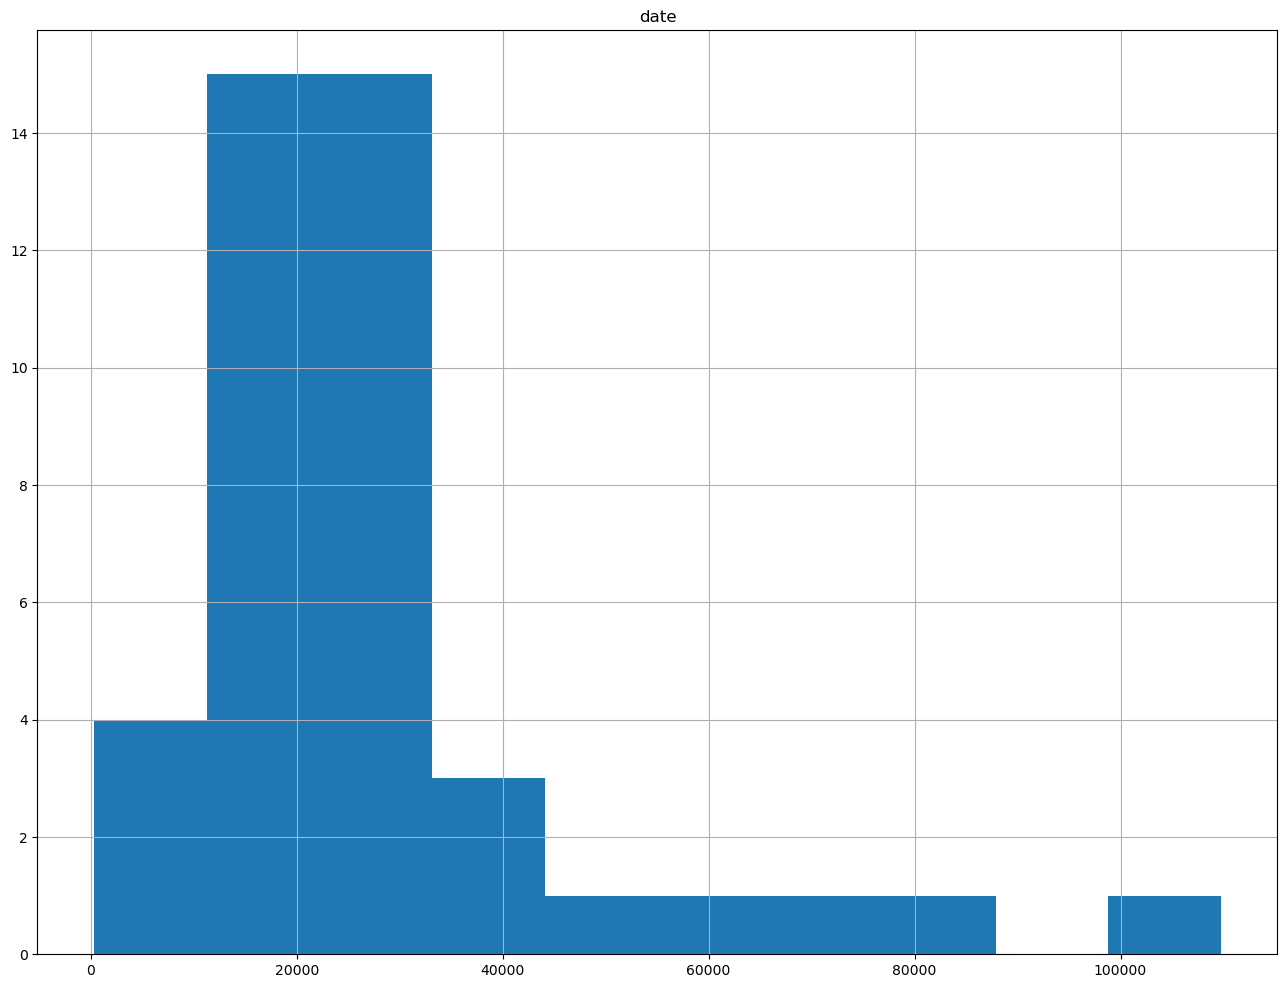

In [66]:
all_data.groupby('shop_id').agg({'date':'count'}).hist()

A lot of shops have really poor information of sales (maybe some shops closed in this 3 year interval or they are not popular at all)

###### Shops clasterization

###### Corr matrix

In [55]:
sales_train.drop(columns=['date', 'shop_id', 'item_id']).corr()

,date_block_num,item_price,item_cnt_day
date_block_num,1.0,0.1,0.0
item_price,0.1,1.0,0.0
item_cnt_day,0.0,0.0,1.0


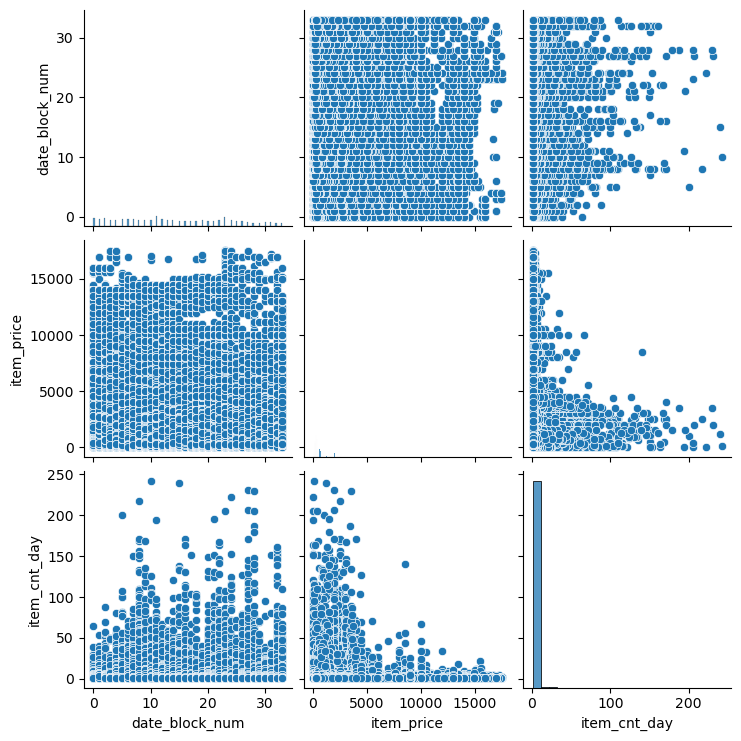

In [56]:
sns.pairplot(sales_train.drop(columns=['shop_id', 'item_id']))

###### as we can see cheap items are bought in bulk, so we can make clusters for item_price (eg. cheap, medium, expensive)

### Validation schema

In [175]:
from datetime import timedelta, datetime

def column_assert(cols):
    def func_wrapper(f):
        def _wrapper(df, *args, **kwargs):
            required_cols = set(cols)
            assert required_cols.issubset(df.columns), f'Required columns are missing {required_cols - set(df.columns)}'
            return f(df, *args, **kwargs)
        return _wrapper
    return func_wrapper
        

@column_assert(['date'])
def val_schema_get_time_split(df, split_date):
    required_cols = set(['date'])
    
    assert required_cols.issubset(df.columns), f'Required columns are missing {required_cols - set(df.columns)}'
    
    return df[df.date < split_date]

@column_assert(['date'])
def val_schema_get_time_interval(df, split_dates):
    required_cols = set(['date'])
    
    assert required_cols.issubset(df.columns), f'Required columns are missing {required_cols - set(df.columns)}'
    
    return df[(df.date > split_dates[0]) & (df.date < split_dates[1])]


In [176]:
temp_data1 = all_data.date[len(all_data.date)//2]
temp_data2 = all_data.date[len(all_data.date)//2 + 10000]
print(temp_data1, temp_data2)

2014-07-25 2014-09-01


In [177]:
val_schema_get_time_split(all_data, temp_data1).head(2) # [temp_data1, temp_data2]

,date,month_number,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,ID,day,week_number,month,year
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150983,2,0,1,2013
2,2013-01-08,0,59,21759,499.0,1.0,ЧУЖОЙ ПРОТИВ ХИЩНИКА (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",149993,8,1,1,2013


In [178]:
val_schema_get_time_interval(all_data, [temp_data1, temp_data2]).head(2)

,date,month_number,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,ID,day,week_number,month,year
47,2014-08-01,19,59,10039,199.0,1.0,ВОССТАНИЕ ПЛАНЕТЫ ОБЕЗЬЯН (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",149746,1,82,8,2014
54,2014-08-10,19,59,14777,299.0,1.0,МОРСКОЙ БОЙ (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",149401,10,83,8,2014


In [179]:
class HandlerRegistry:
    def __init__(self):
        self._registry = {}

    def __getitem__(self, __k):
        if isinstance(__k, str):
            return self._registry[__k]
        else:
            return __k
        
    def __setitem__(self, __k, __v):
        if isinstance(__k, str):
            self._registry[__k] = __v
        else:
            raise KeyError(f"Unsupported key {f}, expected type(str)")
            
    def register(self, key):
        
        def _identity_wrapper(obj):
            self[key] = obj
            return obj
        
        return _identity_wrapper
        

class FeatureExtractor:
    class _FeatureView:
        def saturate(self, df):
            pass
        
        def produce_samples(self, df):
            pass
        
      
    def _get_view(self):
        pass
    
    def fit(df):
        pass
    
    def serialize(self):
        pass
    
    def deserialize(self):
        pass
    
    view = property(fget=_get_view)

In [180]:
class SaleCV:
    def __init__(self, val_cfg, data, metrics, registry, callbacks):
        self._eval_range = val_cfg['eval_range']
        self._train_start = val_cfg['train_start']
        self._metrics = metrics
        
        self._registry = registry
        self._callbacks = callbacks
        
        assert set(['date', 'shop_id', 'item_category_id', 'item_id', 'item_cnt_day']).issubset(data.columns), "Invalid data schema provided"
        self._data = data
        
    def _calculate_target(self, df):
        return (df
            .groupby(['shop_id', 'item_category_id', 'item_id'])
            .agg({'item_cnt_day': 'sum'})
            .reset_index()
            .rename({'item_cnt_day': 'target'}, axis=1)
        )
    
    def _calculate_metrics(self, y_pred, y_true):
        return {
            metric_name: self._registry[handler](y_pred, y_true)
        }
    
    def evaluate(self, feature_view, processor, model):
        eval_report = {}
        
        for eval_dt in self._eval_range:
            train_range = self._data[(self._data.date > self._train_start) & (self._data.date < eval_dt)]
            eval_range = self._data[(self._data.date >= eval_dt) & (self._data.date < (datetime.strptime(eval_dt, '%Y-%m-%d') + timedelta(days=30)).strftime('%Y-%m-%d'))]
        
            # Train step
            t_idx, t_x, t_y = feature_view.produce_samples(train_range)
            t_x_proceed = processor.fit_transfore(t_x)
            model.fit(t_x, t_y)
            t_y_pred = model.predict(t_x)
            
            # Evaluation step
            eval_sample_raw = self._calculate_target(eval_range)
            eval_sample_raw['date'] = datetime(eval_dt)
            e_idx, e_x, e_y = feature_view.saturate(eval_sample_raw)
            e_x_proceed = processor.transform(e_x)
            e_y_pred = model.predict(e_x)
            
            
            # Metrics
            t_metrics = self._calculate_metrics(t_y_pred, t_y)
            e_metrics = self._calculate_metrics(e_y_pred, e_y)
        
            eval_report[eval_dt] = {
                'train': (t_idx, t_x, t_y, t_y_pred),
                'eval': (e_idx, e_x, e_y, e_y_pred)
            }
            
            for callback in self._callbacks:
                callback.invoke(eval_stamp=eval_dt, report=eval_report[eval_dt], feature_view=feature_view, processor=processor, model=model)